In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Classification_train.csv')

In [3]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      8       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      7       0       0       0       0       0       0       0       0   
4      7       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
X_train=df.loc[0:26999, 'pixel0' : 'pixel783']
y_train=df.loc[0:26999, 'label']

In [5]:
X_cv=df.loc[27000:, 'pixel0' : 'pixel783']
y_cv=df.loc[27000:, 'label']

In [6]:
X_train=X_train/255
X_cv=X_cv/255

In [7]:
m,n=X_train.shape
l=10
y_actual=np.zeros((m,l))
for c in range(l):
  for i in range (m):
    if(y_train[i]==c):
      y_actual[i,c]=1

In [8]:
print(y_actual)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [9]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [10]:
def cost(X,y,W,b):
  f_wb=sigmoid(np.dot(X,W)+b)
  return -np.sum((1-y)*np.log(1-f_wb)+y*np.log(f_wb))/X.shape[0]

In [11]:
def gradient(X,y,W,b):
  f=sigmoid(np.dot(X,W)+b)-y
  dj_db=np.sum((f),axis=0)/X.shape[0]
  dj_dw=np.dot(X.T,f)/X.shape[0]
  return dj_dw,dj_db

In [54]:
lr=7
iters=1000
m,n=X_train.shape
Weights=np.zeros((n,l))
bias=np.zeros(l,)
c=[]
for i in range(iters):
    dj_dw,dj_db=gradient(X_train,y_actual,Weights,bias)
    Weights=Weights-lr*dj_dw
    bias=bias-lr*dj_db
    ct=cost(X_train,y_actual,Weights,bias)/10
    if(i%100==0):
        print("cost at ",i,"=",ct)
    c.append(ct)

cost at  0 = 3.5622358920864086
cost at  100 = 0.04007115068800955
cost at  200 = 0.028366228555027146
cost at  300 = 0.026552597072153766
cost at  400 = 0.025417248514540774
cost at  500 = 0.024586127587088728
cost at  600 = 0.023939746749224285
cost at  700 = 0.02341269092080576
cost at  800 = 0.0229698107180506
cost at  900 = 0.022589315375280396


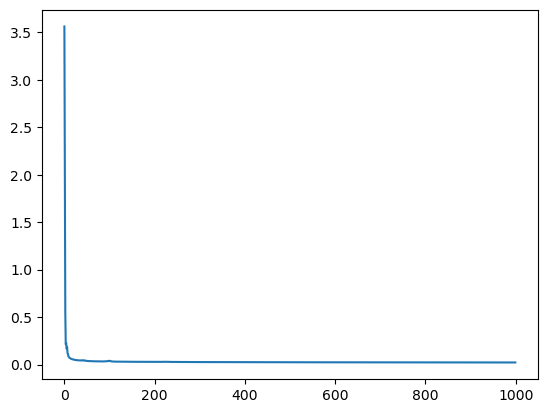

In [55]:
plt.plot(c)
plt.show()

In [56]:
Weights.shape

(784, 10)

In [57]:
print(bias)

[-5.45205558  0.71096003 -2.56804599 -4.65772358 -3.74574241 -7.03632061
  1.48041019 -2.59634837 -2.11294891 -1.3971413 ]


In [58]:
print(Weights)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
y_pred=sigmoid(np.dot(X_cv,Weights)+bias)
y_pred.shape

(3000, 10)

In [60]:
y_pred_final=np.argmax(y_pred,axis=1)

In [61]:
y_cv_np=np.array(y_cv)

In [62]:
np.sum((y_pred_final==y_cv_np)*1)/3000*100

97.03333333333333

In [63]:
y_train_pred=sigmoid(np.dot(X_train,Weights)+bias)
y_train_final=np.argmax(y_train_pred,axis=1)
np.sum((y_train_final==y_train)*1)/27000*100

97.57407407407406

In [64]:
df2=pd.read_csv("Classification_test.csv")

In [65]:
df2.head()

ID  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0  15795       0       0       0       0       0       0       0       0   
1    860       0       0       0       0       0       0       0       0   
2   5390       0       0       0       0       0       0       0       0   
3  11964       0       0       0       0       0       0       0       0   
4  11284       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [69]:
X_test=np.array(df2.loc[:,"pixel0":"pixel783"])/255

In [71]:
y_test=sigmoid(np.dot(X_test,Weights)+bias)

In [72]:
y_test_final=np.argmax(y_pred,axis=1)

In [73]:
id=np.array(df2.loc[:,"ID"])
df3= pd.DataFrame({'id': data_array[:,0], 'label': labels})


df.to_csv('result.csv')